# During Steroid Era Section

In [293]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

In [294]:
# Create a hitting dataframe
hitting_df_cleaned = pd.read_csv('hitting_df_cleaned.csv')

In [295]:
hitting_df_cleaned.head()

,yearID,AB,H,HR,BA,SLG,OPS,HR_prior,HR_increase,BA_increase,SLG_increase,OPS_increase
0,1994,345,86,9,0.249,0.394,0.687,0.0,0.000,0.000,0.000,0.000
1,1995,420,107,17,0.255,0.452,0.773,9.0,88.889,2.201,14.758,12.653
2,1996,320,81,8,0.253,0.428,0.735,17.0,-52.941,-0.643,-5.362,-4.920
3,1997,252,69,6,0.274,0.433,0.747,8.0,-25.000,8.172,1.031,1.601
4,2006,255,54,5,0.212,0.333,0.605,0.0,0.000,0.000,0.000,0.000


In [296]:
during_df =hitting_df_cleaned[(hitting_df_cleaned['yearID'] >= 1994) & (hitting_df_cleaned['yearID'] <= 2004)]

In [297]:
during_df.round(3).describe()

,yearID,AB,H,HR,BA,SLG,OPS,HR_prior,HR_increase,BA_increase,SLG_increase,OPS_increase
count,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000
mean,1999.239090,450.311978,126.219591,16.198700,0.277635,0.452037,0.803315,13.617456,15.213630,0.217234,1.003338,0.718022
std,3.101613,117.844415,39.334614,10.892008,0.030169,0.077197,0.108496,12.086635,68.600172,10.506540,13.943840,11.001911
min,1994.000000,222.000000,41.000000,3.000000,0.163000,0.285000,0.535000,0.000000,-87.879000,-35.639000,-39.559000,-35.253000
25%,1997.000000,350.000000,94.000000,8.000000,0.257000,0.396000,0.727000,4.000000,-21.429000,-5.462750,-7.306250,-5.716250
50%,1999.000000,460.000000,127.000000,14.000000,0.277000,0.444000,0.792000,11.000000,0.000000,0.000000,0.000000,0.000000
75%,2002.000000,551.000000,157.000000,22.000000,0.297000,0.495000,0.863000,21.000000,32.412250,5.209750,8.225500,6.222500
max,2004.000000,704.000000,262.000000,73.000000,0.394000,0.863000,1.425000,73.000000,1033.333000,66.295000,81.080000,68.260000


In [298]:
during_df.corr()

,yearID,AB,H,HR,BA,SLG,OPS,HR_prior,HR_increase,BA_increase,SLG_increase,OPS_increase
yearID,1.000000,0.125998,0.088891,0.073303,-0.054284,0.006764,-0.014360,0.075491,-0.041743,-0.023081,-0.052805,-0.052080
AB,0.125998,1.000000,0.945101,0.518390,0.337646,0.292561,0.299152,0.328187,0.240784,0.063777,0.055046,0.046905
H,0.088891,0.945101,1.000000,0.550651,0.614578,0.469396,0.503079,0.346169,0.256076,0.214903,0.174287,0.180876
HR,0.073303,0.518390,0.550651,1.000000,0.337636,0.839376,0.766397,0.655946,0.273416,0.114916,0.242772,0.221613
BA,-0.054284,0.337646,0.614578,0.337636,1.000000,0.668792,0.753638,0.210876,0.166558,0.493493,0.391095,0.430036
SLG,0.006764,0.292561,0.469396,0.839376,0.668792,1.000000,0.965191,0.544458,0.245584,0.329023,0.421037,0.414325
OPS,-0.014360,0.299152,0.503079,0.766397,0.753638,0.965191,1.000000,0.526716,0.215374,0.351393,0.398376,0.416680
HR_prior,0.075491,0.328187,0.346169,0.655946,0.210876,0.544458,0.526716,1.000000,-0.217207,-0.107389,-0.192810,-0.167206
HR_increase,-0.041743,0.240784,0.256076,0.273416,0.166558,0.245584,0.215374,-0.217207,1.000000,0.295570,0.610121,0.531486
BA_increase,-0.023081,0.063777,0.214903,0.114916,0.493493,0.329023,0.351393,-0.107389,0.295570,1.000000,0.788896,0.864450


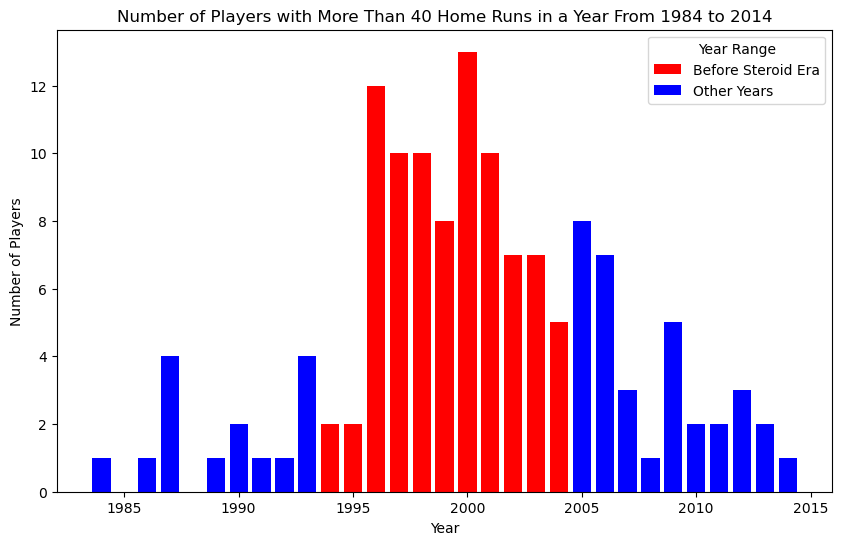

In [299]:
import matplotlib.pyplot as plt

# Filter for players who hit more than 40 home runs
home_run_threshold = 40
during_df_over_40 = hitting_df_cleaned[hitting_df_cleaned['HR'] >= home_run_threshold]

# Count the number of players per year
players_per_year = during_df_over_40['yearID'].value_counts().sort_index()

# Define the years to highlight
highlight_years = range(1994, 2005)

# Create a list of colors for each year
colors = ['red' if year in highlight_years else 'blue' for year in players_per_year.index]

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(players_per_year.index, players_per_year.values, color=colors)
plt.xlabel('Year')
plt.ylabel('Number of Players')
plt.title('Number of Players with More Than 40 Home Runs in a Year From 1984 to 2014')

# Create custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', label='Before Steroid Era'),
                   Patch(facecolor='blue', label='Other Years')]

# Add legend to plot
plt.legend(handles=legend_elements, title='Year Range')

# Show plot
plt.show()


This histogram shows the number of players who it over 40 home runs in a single year with the steroid era section of the graph highlighted.

In [300]:
#display before steroid era dataframe
during_df.describe().round(3)

,yearID,AB,H,HR,BA,SLG,OPS,HR_prior,HR_increase,BA_increase,SLG_increase,OPS_increase
count,2154.000,2154.000,2154.000,2154.000,2154.000,2154.000,2154.000,2154.000,2154.000,2154.000,2154.000,2154.000
mean,1999.239,450.312,126.220,16.199,0.278,0.452,0.803,13.617,15.214,0.217,1.003,0.718
std,3.102,117.844,39.335,10.892,0.030,0.077,0.108,12.087,68.600,10.507,13.944,11.002
min,1994.000,222.000,41.000,3.000,0.163,0.285,0.535,0.000,-87.879,-35.639,-39.559,-35.253
25%,1997.000,350.000,94.000,8.000,0.257,0.396,0.727,4.000,-21.429,-5.463,-7.306,-5.716
50%,1999.000,460.000,127.000,14.000,0.277,0.444,0.792,11.000,0.000,0.000,0.000,0.000
75%,2002.000,551.000,157.000,22.000,0.297,0.495,0.863,21.000,32.412,5.210,8.226,6.222
max,2004.000,704.000,262.000,73.000,0.394,0.863,1.425,73.000,1033.333,66.295,81.080,68.260


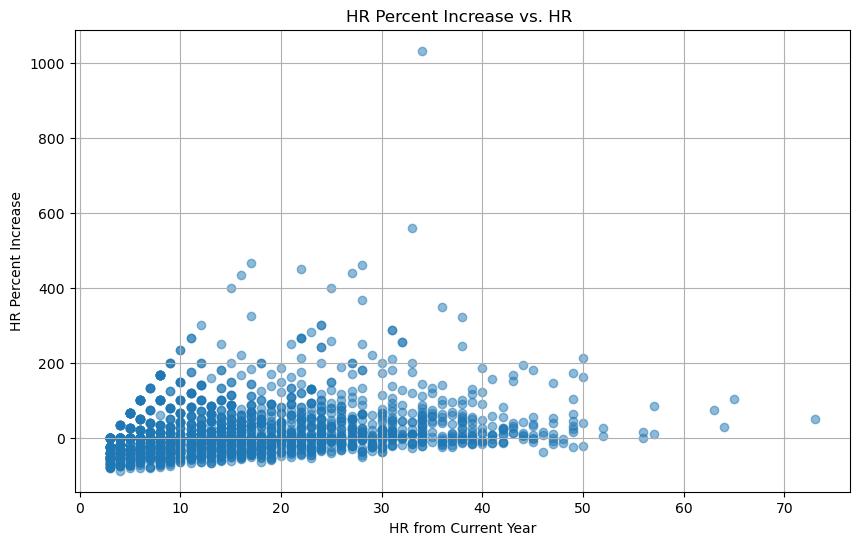

In [301]:
plt.figure(figsize=(10, 6))
plt.scatter(during_df['HR'], during_df['HR_increase'], alpha=0.5)
plt.title('HR Percent Increase vs. HR ')
plt.xlabel('HR from Current Year')
plt.ylabel('HR Percent Increase')
plt.grid(True)
plt.show()

This scatterplot shows the number of home runs in a given year, and the percentage higher the count was from the previous year. A higher percentage increase means that that player had a significant jump in performance over the course of just one year.

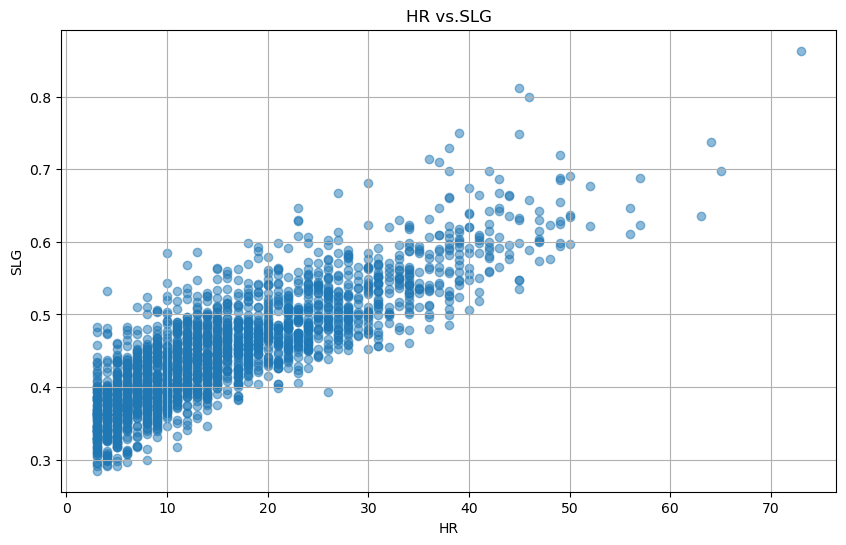

In [302]:
plt.figure(figsize=(10, 6))
plt.scatter(during_df['HR'], during_df['SLG'], alpha=0.5)
plt.title('HR vs.SLG')
plt.xlabel('HR')
plt.ylabel('SLG')
plt.grid(True)
plt.show()

It makes sense that as the number of home runs increases, the slugging percentage also increase, since slugging percentage takes into account extra base hits, including home runs, this is a great indication of a hitters power.

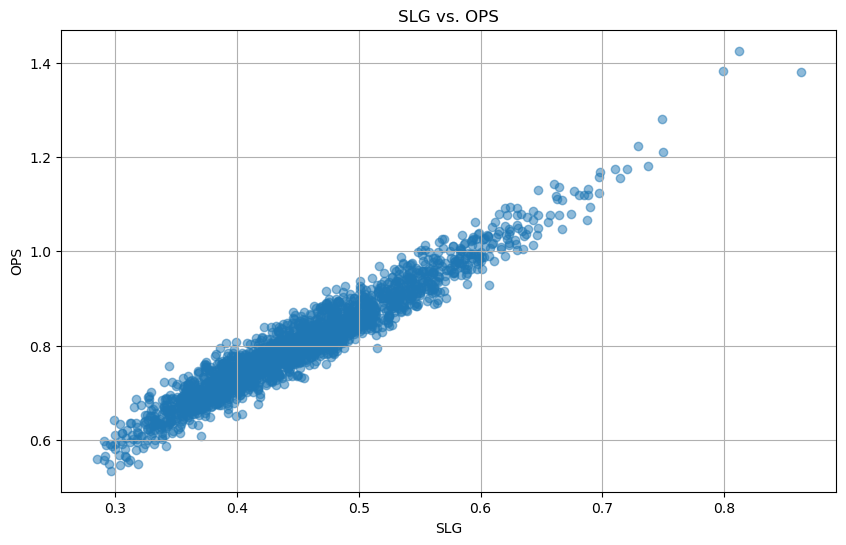

In [303]:
plt.figure(figsize=(10, 6))
plt.scatter(during_df['SLG'], during_df['OPS'], alpha=0.5)
plt.title('SLG vs. OPS')
plt.xlabel('SLG')
plt.ylabel('OPS')
plt.grid(True)
plt.show()

This scatterplot shows the slugging percentage vs the On-base plus Slugging percentage, as the SLG increases, the OPS also increases because the better hitter they are, the more they will get one base.

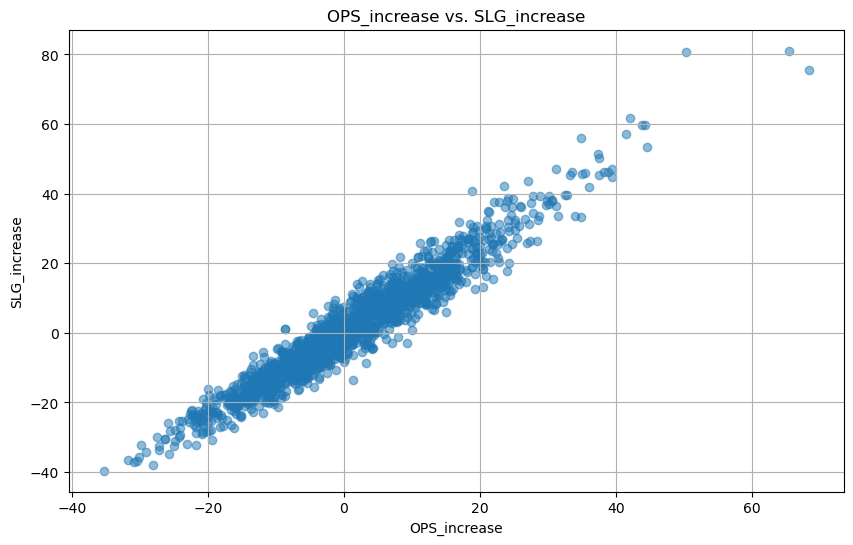

In [304]:
plt.figure(figsize=(10, 6))
plt.scatter(during_df['OPS_increase'], during_df['SLG_increase'], alpha=0.5)
plt.title('OPS_increase vs. SLG_increase')
plt.xlabel('OPS_increase')
plt.ylabel('SLG_increase')
plt.grid(True)
plt.show()

As the OPS_increase gets larger, the SLG_increase also grows larger because SLG is one of the variables that makes up OPS, so as one increases, so does the other.

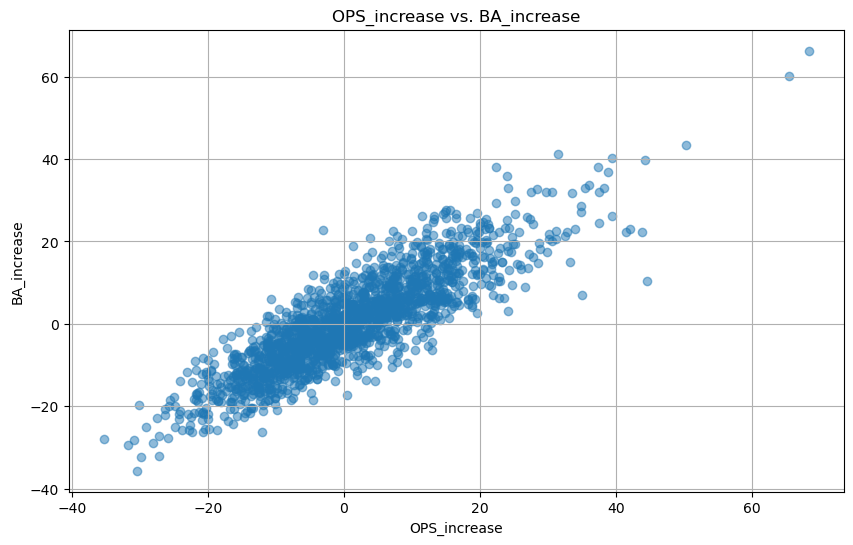

In [305]:
plt.figure(figsize=(10, 6))
plt.scatter(during_df['OPS_increase'], during_df['BA_increase'], alpha=0.5)
plt.title('OPS_increase vs. BA_increase')
plt.xlabel('OPS_increase')
plt.ylabel('BA_increase')
plt.grid(True)
plt.show()

As the OPS_increase grows larger, so does the BA_increase because a higher batting average means they are getting more hits, thus increasing the OPS.

### KMeans Section

In [306]:
#scale the features, using StandardScaler
scaler = StandardScaler()
during_df = scaler.fit_transform(during_df)


In [307]:
# Define custom colors for each class
custom_colors = ['teal', 'purple', 'blue', 'red', 'orange']

In [308]:
# Initialize a list to store the values of inertia (within-cluster sum of squares)
inertia = []

In [309]:
# Iterate over a range of values for K (number of clusters)
for k in range(1, 11):
    # Create a KMeans instance with K clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    # Fit the model to the data
    kmeans.fit(during_df)
    # Append the inertia to the list
    inertia.append(kmeans.inertia_)

C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Window

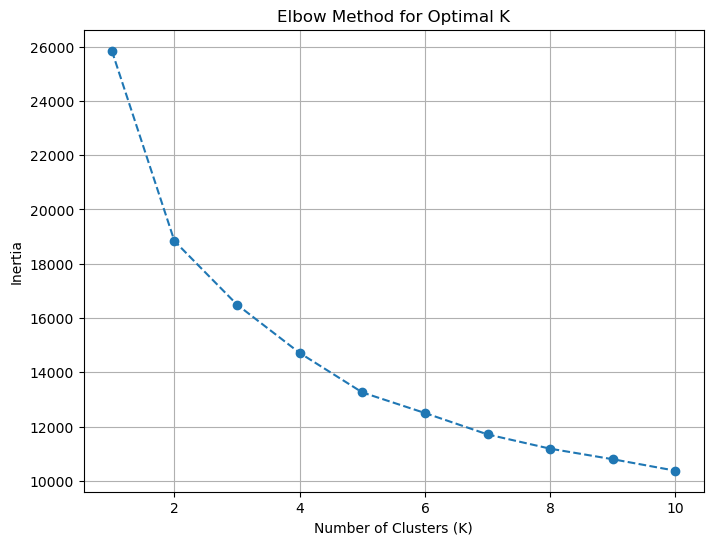

In [310]:
# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

### KMeans for HR vs. HR Percent Increase

In [311]:
# Perform k-means clustering with K=3
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
kmeans.fit(during_df)
labels = kmeans.labels_

C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


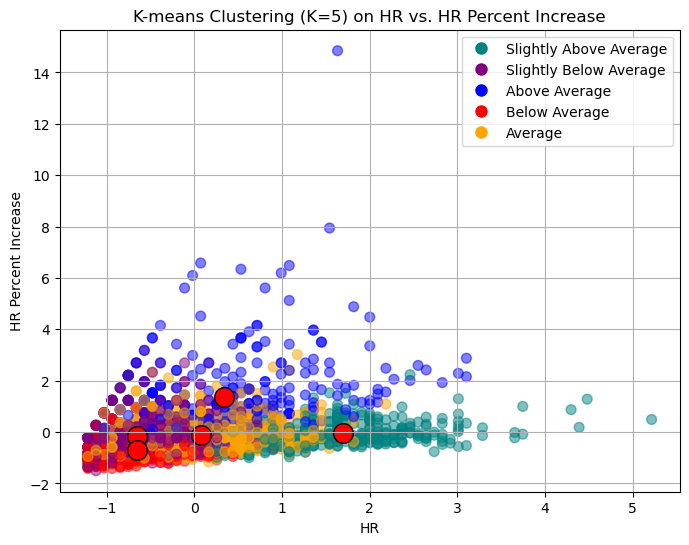

In [312]:
# Visualize the clusters
plt.figure(figsize=(8, 6))

# Plot the points with color based on the cluster labels
plt.scatter(during_df[:, 3], during_df[:, 8], c=labels, cmap=ListedColormap(custom_colors), s=50, alpha=0.5)

# Plot the centroids of the clusters
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 3], centroids[:, 8], marker='o', c='red', s=200, edgecolors='k')

# Add legend specifying the class of wine for each cluster
legend_labels = ['Slightly Above Average', 'Slightly Below Average', 'Above Average', 'Below Average', 'Average']  # Custom labels for each class
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for color, label in zip(custom_colors, legend_labels)]

# Add the legend to the plot
plt.legend(handles=legend_handles)

plt.xlabel('HR')
plt.ylabel('HR Percent Increase')
plt.title('K-means Clustering (K=5) on HR vs. HR Percent Increase')
plt.grid(True)
plt.show()

In [313]:
# Count the number of players in each cluster
unique, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Number of players in each cluster:", cluster_counts)

# Assuming label 2 corresponds to "Above Average"
above_average_count = cluster_counts[2]
print("Number of 'Above Average' players:", above_average_count)

Number of players in each cluster: {0: 283, 1: 658, 2: 296, 3: 306, 4: 611}
Number of 'Above Average' players: 296


In [314]:
total_players = len(labels)
percentage_above_average = (above_average_count / total_players) * 100
print(f"Percentage of 'Above Average' players: {percentage_above_average:.2f}%")

Percentage of 'Above Average' players: 13.74%


### KMeans for HR vs. SLG

In [315]:
# Perform k-means clustering with K=3
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
kmeans.fit(during_df)
labels = kmeans.labels_

C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


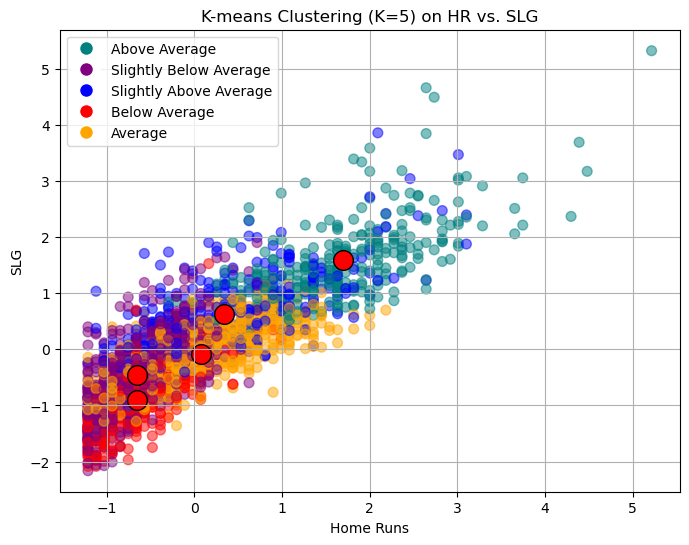

In [316]:
# Visualize the clusters
plt.figure(figsize=(8, 6))

# Plot the points with color based on the cluster labels
plt.scatter(during_df[:, 3], during_df[:, 5], c=labels, cmap=ListedColormap(custom_colors), s=50, alpha=0.5)

# Plot the centroids of the clusters
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 3], centroids[:, 5], marker='o', c='red', s=200, edgecolors='k')

# Add legend specifying the class of wine for each cluster
legend_labels = ['Above Average', 'Slightly Below Average', 'Slightly Above Average', 'Below Average', 'Average']  # Custom labels for each class
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for color, label in zip(custom_colors, legend_labels)]

# Add the legend to the plot
plt.legend(handles=legend_handles)

plt.xlabel('Home Runs')
plt.ylabel('SLG')
plt.title('K-means Clustering (K=5) on HR vs. SLG')
plt.grid(True)
plt.show()

In [317]:
# Count the number of players in each cluster
unique, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Number of players in each cluster:", cluster_counts)

# Assuming label 2 corresponds to "Above Average"
above_average_count = cluster_counts[0]
print("Number of 'Above Average' players:", above_average_count)

Number of players in each cluster: {0: 283, 1: 658, 2: 296, 3: 306, 4: 611}
Number of 'Above Average' players: 283


In [318]:
total_players = len(labels)
percentage_above_average = (above_average_count / total_players) * 100
print(f"Percentage of 'Above Average' players: {percentage_above_average:.2f}%")

Percentage of 'Above Average' players: 13.14%


### KMeans for SLG vs. OPS

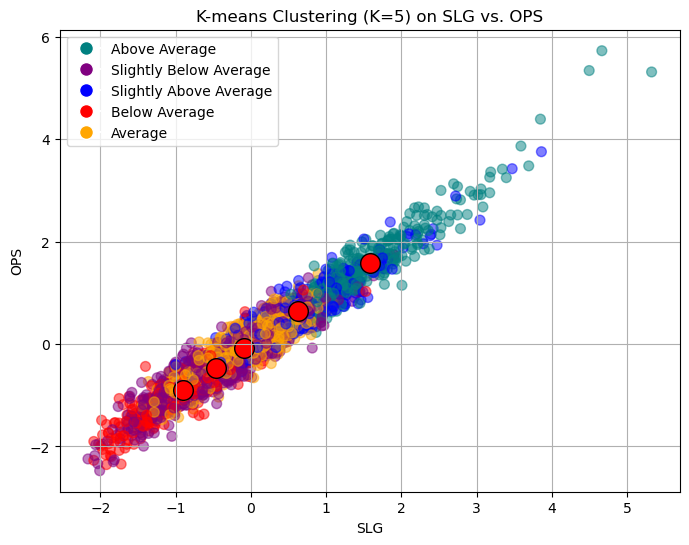

In [319]:
# Visualize the clusters
plt.figure(figsize=(8, 6))

# Plot the points with color based on the cluster labels
plt.scatter(during_df[:, 5], during_df[:, 6], c=labels, cmap=ListedColormap(custom_colors), s=50, alpha=0.5)

# Plot the centroids of the clusters
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 5], centroids[:, 6], marker='o', c='red', s=200, edgecolors='k')

# Add legend specifying the class of wine for each cluster
legend_labels = ['Above Average', 'Slightly Below Average', 'Slightly Above Average', 'Below Average', 'Average']  # Custom labels for each class
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for color, label in zip(custom_colors, legend_labels)]

# Add the legend to the plot
plt.legend(handles=legend_handles)

plt.xlabel('SLG')
plt.ylabel('OPS')
plt.title('K-means Clustering (K=5) on SLG vs. OPS')
plt.grid(True)
plt.show()

In [320]:
# Count the number of players in each cluster
unique, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Number of players in each cluster:", cluster_counts)

# Assuming label 2 corresponds to "Above Average"
above_average_count = cluster_counts[0]
print("Number of 'Above Average' players:", above_average_count)

Number of players in each cluster: {0: 283, 1: 658, 2: 296, 3: 306, 4: 611}
Number of 'Above Average' players: 283


In [321]:
total_players = len(labels)
percentage_above_average = (above_average_count / total_players) * 100
print(f"Percentage of 'Above Average' players: {percentage_above_average:.2f}%")

Percentage of 'Above Average' players: 13.14%


### KMeans for OPS Increase vs. SLG Increase

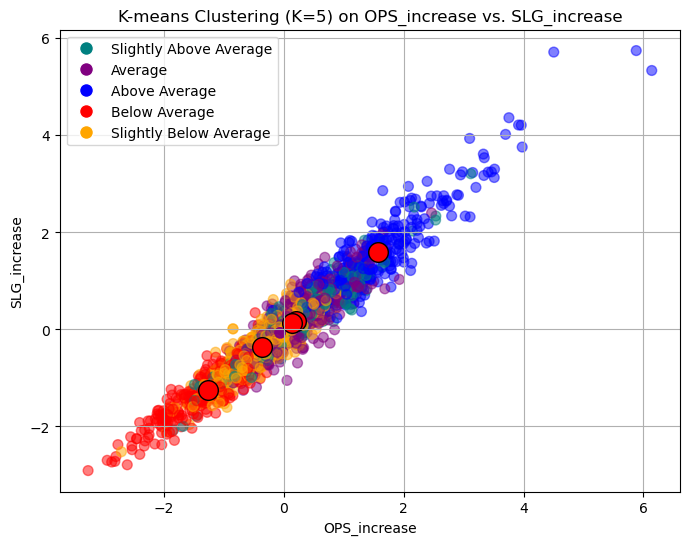

In [322]:
# Visualize the clusters
plt.figure(figsize=(8, 6))

# Plot the points with color based on the cluster labels
plt.scatter(during_df[:, 11], during_df[:, 10], c=labels, cmap=ListedColormap(custom_colors), s=50, alpha=0.5)

# Plot the centroids of the clusters
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 11], centroids[:, 10], marker='o', c='red', s=200, edgecolors='k')

# Add legend specifying the class of wine for each cluster
legend_labels = ['Slightly Above Average', 'Average', 'Above Average', 'Below Average', 'Slightly Below Average']  # Custom labels for each class
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for color, label in zip(custom_colors, legend_labels)]

# Add the legend to the plot
plt.legend(handles=legend_handles)

plt.xlabel('OPS_increase')
plt.ylabel('SLG_increase')
plt.title('K-means Clustering (K=5) on OPS_increase vs. SLG_increase')
plt.grid(True)
plt.show()

In [323]:
# Count the number of players in each cluster
unique, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Number of players in each cluster:", cluster_counts)

# Assuming label 2 corresponds to "Above Average"
above_average_count = cluster_counts[2]
print("Number of 'Above Average' players:", above_average_count)

Number of players in each cluster: {0: 283, 1: 658, 2: 296, 3: 306, 4: 611}
Number of 'Above Average' players: 296


In [324]:
total_players = len(labels)
percentage_above_average = (above_average_count / total_players) * 100
print(f"Percentage of 'Above Average' players: {percentage_above_average:.2f}%")

Percentage of 'Above Average' players: 13.74%


### KMeans for OPS_increase vs. BA_increase

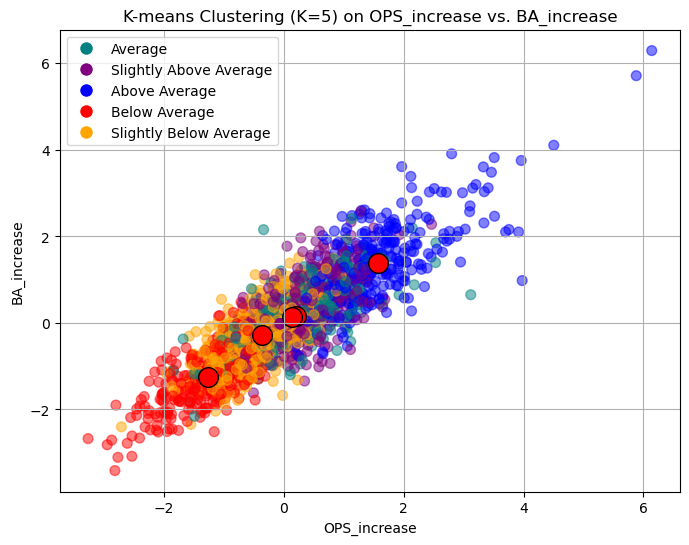

In [325]:
# Visualize the clusters
plt.figure(figsize=(8, 6))

# Plot the points with color based on the cluster labels
plt.scatter(during_df[:, 11], during_df[:, 9], c=labels, cmap=ListedColormap(custom_colors), s=50, alpha=0.5)

# Plot the centroids of the clusters
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 11], centroids[:, 9], marker='o', c='red', s=200, edgecolors='k')

# Add legend specifying the class of wine for each cluster
legend_labels = ['Average', 'Slightly Above Average', 'Above Average', 'Below Average', 'Slightly Below Average']  # Custom labels for each class
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for color, label in zip(custom_colors, legend_labels)]

# Add the legend to the plot
plt.legend(handles=legend_handles)

plt.xlabel('OPS_increase')
plt.ylabel('BA_increase')
plt.title('K-means Clustering (K=5) on OPS_increase vs. BA_increase')
plt.grid(True)
plt.show()

In [326]:
# Count the number of players in each cluster
unique, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Number of players in each cluster:", cluster_counts)

# Assuming label 2 corresponds to "Above Average"
above_average_count = cluster_counts[2]
print("Number of 'Above Average' players:", above_average_count)

Number of players in each cluster: {0: 283, 1: 658, 2: 296, 3: 306, 4: 611}
Number of 'Above Average' players: 296


In [327]:
total_players = len(labels)
percentage_above_average = (above_average_count / total_players) * 100
print(f"Percentage of 'Above Average' players: {percentage_above_average:.2f}%")

Percentage of 'Above Average' players: 13.74%


### KMeans after Applying PCA

In [328]:
# Perform k-means clustering with K=3
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
kmeans.fit(during_df)
labels = kmeans.labels_

C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


In [329]:
# Define custom colors for each class
custom_colors = ['teal', 'purple', 'blue', 'red', 'orange']

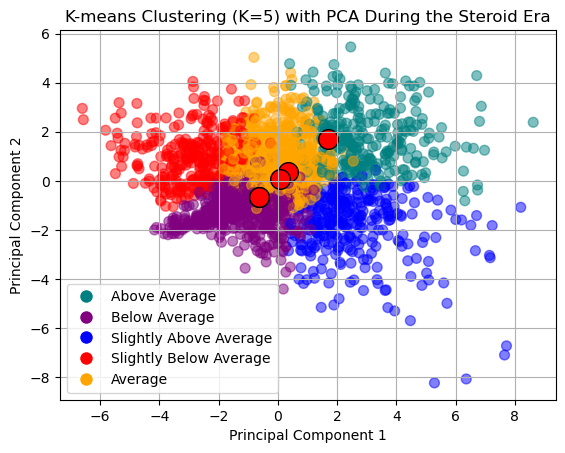

In [330]:
# Plot the points with color based on the cluster labels
plt.scatter(principal_df['Principal Component 1'], principal_df['Principal Component 2'], c=labels, cmap=ListedColormap(custom_colors), s=50, alpha=0.5)

# Plot the centroids of the clusters
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 3], centroids[:, 3], marker='o', c='red', s=200, edgecolors='k')

# Add legend specifying the class of wine for each cluster
legend_labels = ['Above Average', 'Below Average', 'Slightly Above Average', 'Slightly Below Average', 'Average']  # Custom labels for each class
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for color, label in zip(custom_colors, legend_labels)]
plt.legend(handles=legend_handles)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering (K=5) with PCA During the Steroid Era')
plt.grid(True)
plt.show()

In [331]:
# Count the number of players in each cluster
unique, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Number of players in each cluster:", cluster_counts)

# Assuming label 2 corresponds to "Above Average"
above_average_count = cluster_counts[0]
print("Number of 'Above Average' players:", above_average_count)

Number of players in each cluster: {0: 283, 1: 658, 2: 296, 3: 306, 4: 611}
Number of 'Above Average' players: 283


In [332]:
total_players = len(labels)
percentage_above_average = (above_average_count / total_players) * 100
print(f"Total Players: {total_players:.2f}")
print(f"Percentage of 'Above Average' players: {percentage_above_average:.2f}%")

Total Players: 2154.00
Percentage of 'Above Average' players: 13.14%
